In [108]:
inputs = [8.5, 0.65, 1.2]
weights = [0.1,0.2,-0.1]
goal_prediction = 1
alpha = 0.01

def NeuralNetwork(inputs, weights):
    assert( len(inputs) == len(weights))
    prediction = 0
    
    for i in range(len(inputs)):
        prediction += inputs[i] * weights[i]
        
    return prediction

def ele_wise_mul(vector, scaler):
    output_vector = []
    
    for i in range(len(vector)):
        output_vector.append(vector[i] * scaler)
    
    return output_vector

def run(inputs, weights, alpha):
    weight_delta_set = []
    error_set = []
    
    for i in range(20):
        pred = NeuralNetwork(inputs, weights)
        error = (pred - goal_prediction) ** 2
        delta = (pred - goal_prediction)
        weight_deltas = ele_wise_mul(inputs, delta)
        #weight_update[0] = 0
        
        for j in range(len(weights)):
            weights[j] -= weight_deltas[j] * alpha
        
        weight_delta_set.append(list(weights))
        error_set.append(error)
        
        print("Iteration: %s, Error: %s, Prediction: %s" % (str(i), error, pred))
        
    return weight_delta_set, error_set

In [109]:
weight_set, error_set = run(inputs, weights, alpha)

Iteration: 0, Error: 0.01959999999999997, Prediction: 0.8600000000000001
Iteration: 1, Error: 0.0013135188062500048, Prediction: 0.9637574999999999
Iteration: 2, Error: 8.802712522307997e-05, Prediction: 0.9906177228125002
Iteration: 3, Error: 5.899249206154892e-06, Prediction: 0.997571162993086
Iteration: 4, Error: 3.953456517877471e-07, Prediction: 0.9993712348198351
Iteration: 5, Error: 2.6494589213863218e-08, Prediction: 0.9998372284139849
Iteration: 6, Error: 1.7755684283936714e-09, Prediction: 0.9999578625056702
Iteration: 7, Error: 1.189919654307157e-10, Prediction: 0.9999890916561555
Iteration: 8, Error: 7.974397162950331e-12, Prediction: 0.9999971761024872
Iteration: 9, Error: 5.344143185591192e-13, Prediction: 0.9999992689635313
Iteration: 10, Error: 3.581445191241023e-14, Prediction: 0.9999998107529342
Iteration: 11, Error: 2.4001508278382324e-15, Prediction: 0.9999999510086658
Iteration: 12, Error: 1.6084914741122043e-16, Prediction: 0.9999999873173683
Iteration: 13, Error:

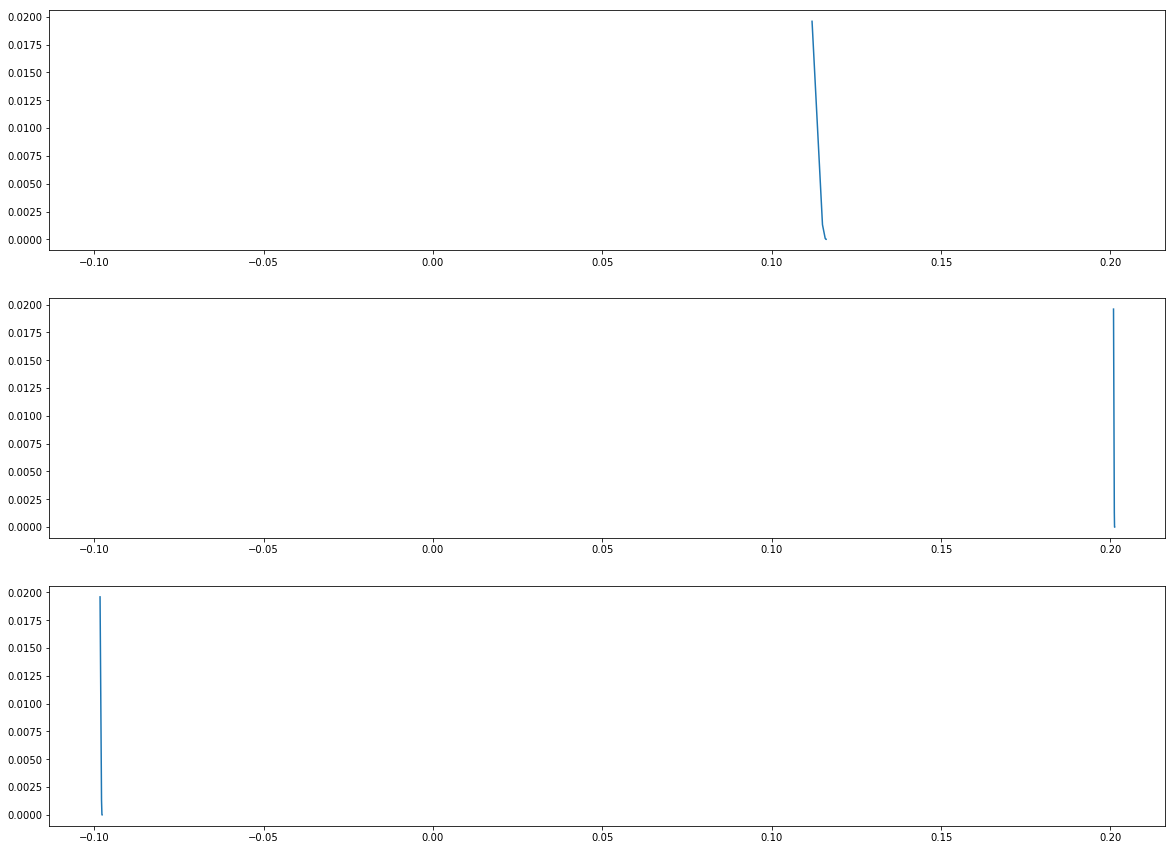

In [110]:
import numpy as np
import matplotlib.pyplot as plt

weight_set = np.array(weight_set)
error_set = np.array(error_set)

node1_weights = weight_set[:,0]
node2_weights = weight_set[:,1]
node3_weights = weight_set[:,2]

node1_indices = node1_weights.argsort()
node1_weights = node1_weights[node1_indices]
error1_set = error_set[node1_indices]

node2_indices = node2_weights.argsort()
node2_weights = node2_weights[node2_indices]
error2_set = error_set[node2_indices]

node3_indices = node3_weights.argsort()
node3_weights = node3_weights[node3_indices]
error3_set = error_set[node3_indices]

plt.figure(figsize=(20,15))
ax1 = plt.subplot(311)
plt.plot(node1_weights, error1_set)

ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.plot(node2_weights, error2_set)

ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(node3_weights, error3_set)

plt.show()